In [ ]:
#0050ETF 報酬與風險分析

# Notebook 架構
1.資料載入與清理
2.報酬率計算
3.績效指標計算（年化報酬、波動、SharpeRatio）
4.風險指標分析（MaxDrawdown）
5.圖表呈現（累積報酬、回撤視覺化）
6.SummaryTable（彙整指標成表格）
7.風控觀點與制度應用建議

In [2]:
#安裝yfinance資料包(yahoo)
!pip install yfinance

In [3]:
#下載0050ETF資料
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

etf=yf.download('0050.TW',start='2020-01-01')
etf.columns.name = None #並未改變多層結構(不建議用)
if isinstance(etf.columns, pd.MultiIndex):
    etf.columns=etf.columns.get_level_values(0) #若是多層欄位，改回單層
etf.head()

/var/folders/zq/r_d33n6n62gfwmqfw4b9g3f00000gn/T/ipykernel_80633/1215494650.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  etf=yf.download('0050.TW',start='2020-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,21.592440,21.669832,21.459768,21.459768,19528060
2020-01-03,21.592440,21.824615,21.448711,21.736168,27254188
2020-01-06,21.316036,21.470820,21.316036,21.459765,37287072
2020-01-07,21.249701,21.382373,21.094917,21.327092,25314408
2020-01-08,21.150196,21.271811,21.017524,21.050691,34067980


/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32929 (\N{CJK UNIFIED IDEOGRAPH-80A1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21218 (\N{CJK UNIFIED IDEOGRAPH-52E2}) missing from font(s) DejaV

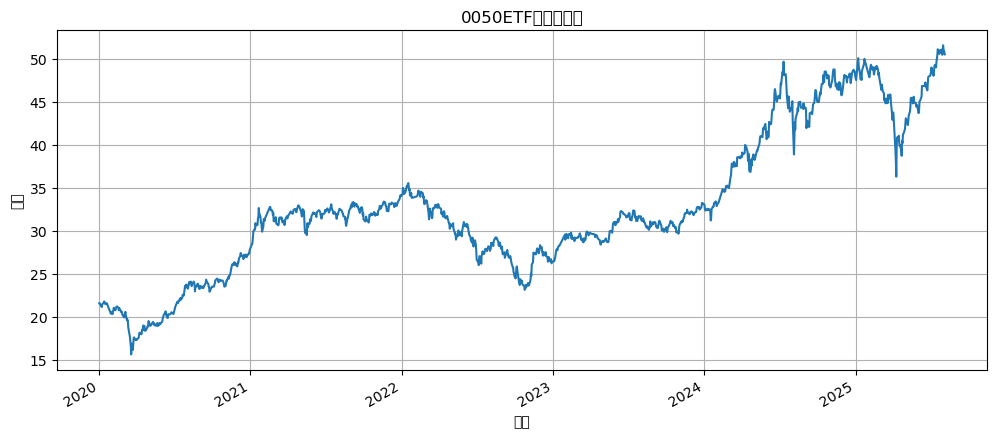

In [4]:
#畫出收盤價走勢圖
etf['Close'].plot(title='0050ETF股價走勢圖',figsize=(12,5))
plt.xlabel('日期')
plt.ylabel('價格')
plt.grid(True)
plt.show()

#字型
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial Unicode MS'  # 適用於 macOS
plt.rcParams['axes.unicode_minus'] = False        # 正負號正常顯示

In [16]:
#計算每日報酬率（每日收盤價的百分比變化）
etf['daily_return']=etf['Close'].pct_change()
daily_return = etf['Close'].pct_change()
print('每日報酬率：',format(daily_return))


每日報酬率： Date
2020-01-02         NaN
2020-01-03    0.000000
2020-01-06   -0.012801
2020-01-07   -0.003112
2020-01-08   -0.004683
                ...   
2025-07-29   -0.011753
2025-07-30    0.010902
2025-07-31    0.010784
2025-08-01   -0.008729
2025-08-04   -0.011742
Name: Close, Length: 1356, dtype: float64


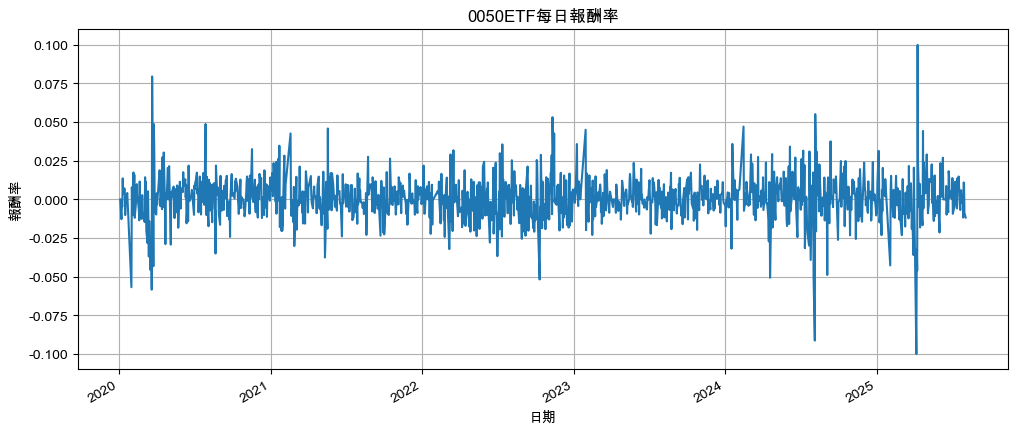

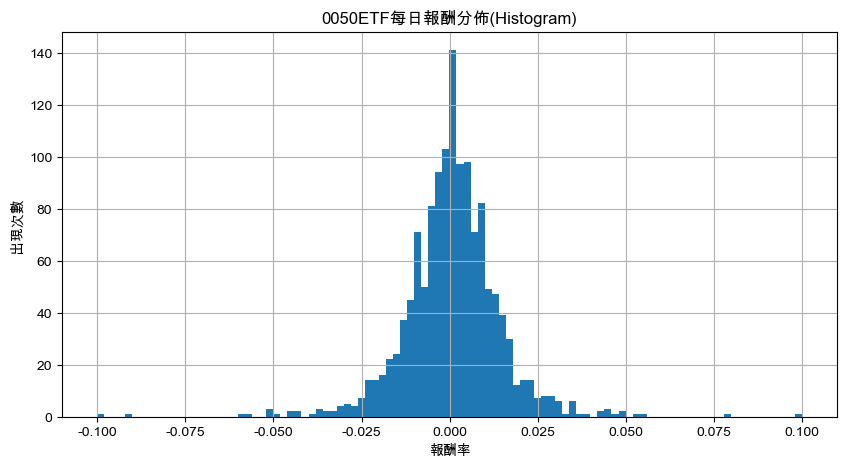

In [15]:
#每日報酬率
etf['daily_return'].plot(title='0050ETF每日報酬率',figsize=(12,5))
plt.xlabel('日期')
plt.ylabel('報酬率')
plt.grid(True)
plt.show()


#報酬率分布圖（風險形狀）histogram
daily_return.hist(bins=100, figsize=(10,5))
plt.title('0050ETF每日報酬分佈(Histogram)')
plt.xlabel('報酬率')
plt.ylabel('出現次數')
plt.grid(True)
plt.show()


In [75]:
#計算年化報酬率、年化波動率
annual_return = etf['daily_return'].mean()*252
annual_volatility = etf['daily_return'].std()*(252**0.5)

print('年化報酬率：',format(annual_return))
print('年化波動率：',format(annual_volatility))


#計算Sharpe Ratio（假設無風險利率=1%）
risk_free_rate = 0.01
sharpe_ratio = (annual_return - risk_free_rate)/annual_volatility

print(f'Sharpe Ratio： {sharpe_ratio:.2f}')

年化報酬率： 0.18205496185941242
年化波動率： 0.2189294330163382
Sharpe Ratio： 0.79


-0.3485890060477065
最大回撤（Max Drawdown）: -34.86%


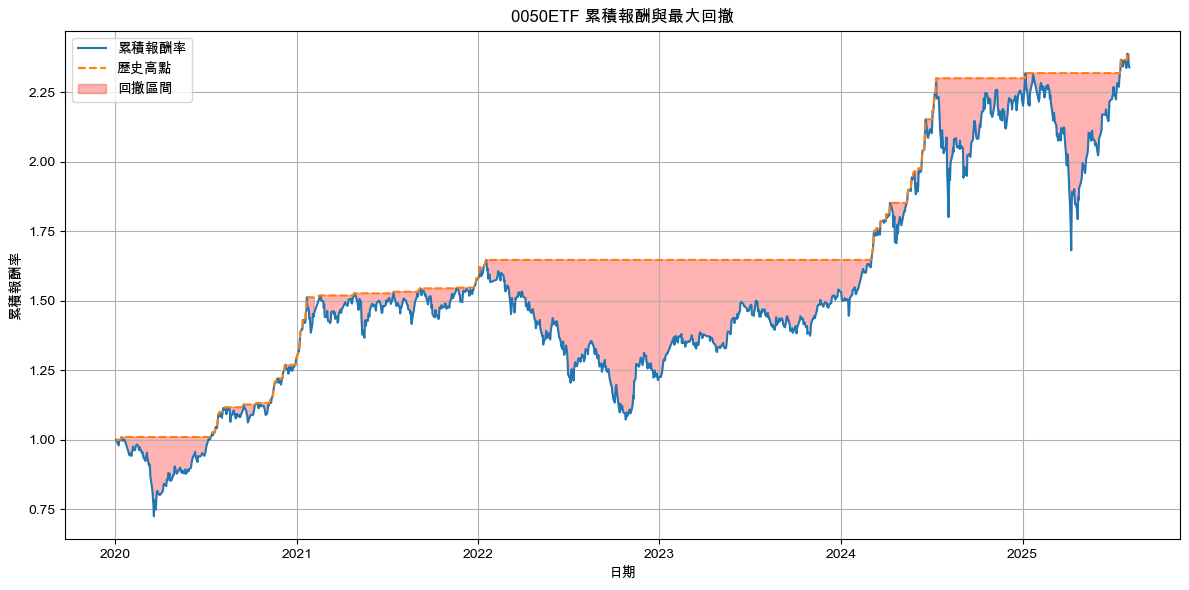

In [68]:
#計算VaR
VaR_95 = etf['daily_return'].quantile(0.05)


#計算累計報酬
cumulative_return = (1 + daily_return).cumprod()
#print(format(cumulative_return))

#計算最大撤回
rolling_max = cumulative_return.cummax()
drawdown = cumulative_return/rolling_max - 1
max_drawdown = drawdown.min()

print(format(max_drawdown))
print("最大回撤（Max Drawdown）: {:.2%}".format(max_drawdown))

#畫圖
plt.figure(figsize=(12, 6))
plt.plot(cumulative_return, label='累積報酬率')
plt.plot(rolling_max, label='歷史高點',linestyle = '--')
plt.fill_between(drawdown.index, cumulative_return,rolling_max,where=cumulative_return < rolling_max,
                 color='red', alpha=0.3, label='回撤區間')
plt.title('0050ETF 累積報酬與最大回撤')
plt.xlabel('日期')
plt.ylabel('累積報酬率')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [76]:
#報表彙整
summary_table = pd.DataFrame({
    '年化報酬率': [annual_return],
    '年化波動率': [annual_volatility],
    'Sharpe Ratio': [sharpe_ratio],
    'VaR(5%)': [VaR_95],
    '最大回撤': [max_drawdown]
})

summary_table.style.format({
    '年化報酬率': "{:.2%}",
    '年化波動率': "{:.2%}",
    'Sharpe Ratio': "{:.2f}",
    'VaR(5%)': "{:.3%}",
    '最大回撤': "{:.2%}"
})



,年化報酬率,年化波動率,Sharpe Ratio,VaR(5%),最大回撤
0,18.21%,21.89%,0.79,-1.995%,-34.86%


In [ ]:
### 分析結論

- 本資料期間內（2020～2025），0050 ETF的年化報酬率為 18.21%，風險/報酬相對合理。
- 最大回撤達 -34.86%，主要發生於疫情、升息及關稅公布期間，需注意極端下行風險。
- Sharpe Ratio 約 0.79，屬於中等風險報酬表現。
- VaR (5%) 約為 -1.99%，表示每日 5% 機率會虧損超過該幅度。


In [ ]:
### 風控應用觀點（制度設計模擬）

針對 0050 ETF這類商品，我會建議設定以下監控指標與限額：

- 最大回撤限額設為 -20%，超過則需通報或調整部位
- Sharpe Ratio 長期低於 0.5，需檢討投資策略
- 若年化波動率高於 20%，須評估是否採取避險操作

這些指標可作為每日或每月監控報表的基礎，用於制度化風險管理與部位控管。
